In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read data
raw = pd.read_csv('vgsales.csv')

In [3]:
# basic view
print(raw.info())
print('-----------------------------------------------')
print(raw.describe())
print('===============================================')
print(raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB
None
-----------------------------------------------
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000    

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [4]:
# Clean data
proc_raw = raw[raw.Year.notnull()]
proc_raw = proc_raw[proc_raw.Year<=2016]
proc_raw = proc_raw[proc_raw.Publisher.notnull()]
proc_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16287 non-null int64
Name            16287 non-null object
Platform        16287 non-null object
Year            16287 non-null float64
Genre           16287 non-null object
Publisher       16287 non-null object
NA_Sales        16287 non-null float64
EU_Sales        16287 non-null float64
JP_Sales        16287 non-null float64
Other_Sales     16287 non-null float64
Global_Sales    16287 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


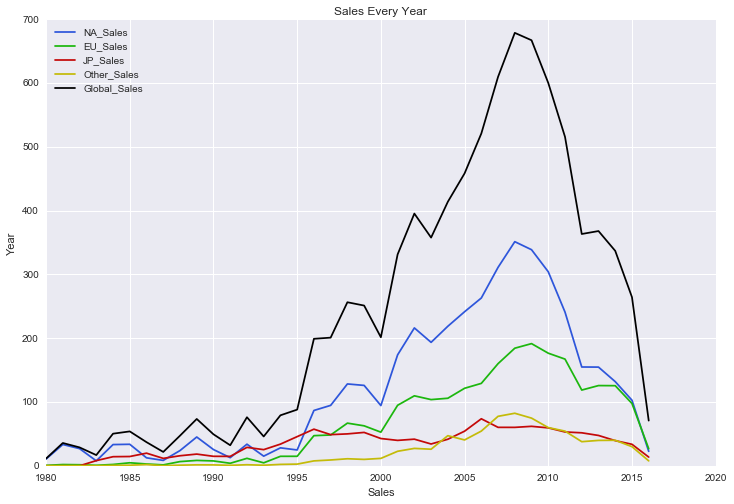

In [5]:
# Sales in different markets every year
sales_year = proc_raw.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()
sales_year.head()
Year = [int(x) for x in sales_year.index.values.tolist()]
fig = plt.figure(figsize=(12,8))
colors = ['#2e56db','#1cb70e','#c40909','#c4bb09','#000000']
for col,c in zip(sales_year, colors):
    plt.plot(Year,sales_year[col],color=c, label=col)
plt.xlabel('Sales')
plt.ylabel('Year')
plt.title('Sales Every Year')
plt.legend(loc='upper left',fontsize='medium')
plt.show()


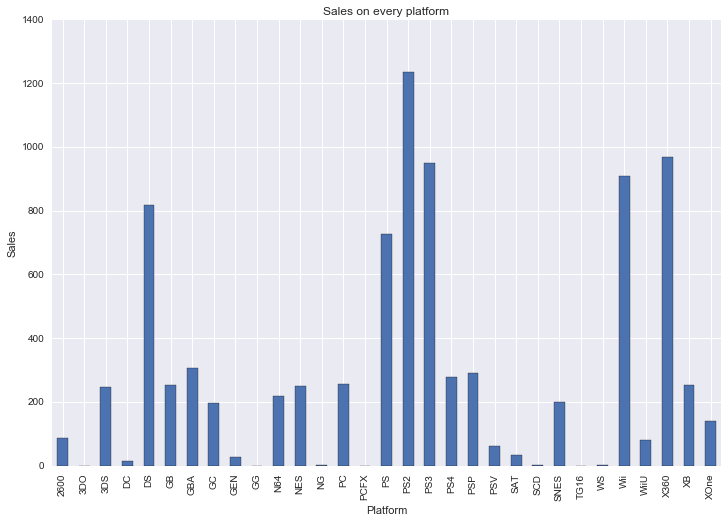

In [6]:
# Sales in diefferent platforms
sales_plat = proc_raw.groupby('Platform')['Global_Sales'].sum()
sales_plat_year = pd.pivot_table(proc_raw, values='Global_Sales', index='Year', columns='Platform', aggfunc=np.sum)
fig = plt.figure(figsize=(12,8))
sales_plat.plot.bar()
plt.ylabel('Sales')
plt.title('Sales on every platform')
plt.show()


In [ ]:
# 